# Pymaceuticals Inc.
---

### Analysis

- Pymaceuticals Analysis The information of 249 mice was analysed.
  
    - 1. 9 drug regimens were tested ( and a placebo). Out of these drugs Ramicane seems to be the most effective in reducing tumor growth, having the lowest mean, median, variance and standard deviation. It is followed closely by Capmulin. This can be seen in the drug summary table and also, in the boxplot. As well both drugs were both the ones that had the highest amount of essays (timepoints).
    - 2. Concerning the sex of the mice, the distribution was almost even, due to the population being composed by 50.74% of male mice and 49.26% of females.
    - 3. The tumor growth for capomulin in two mice has slightly differnet behaviours, but still there is an increase in tumor volume, that is followed by a decrease in tumor volume. The first mouse that was taken as an example first had and increased tumor growth until day following by a drop on day 20. The second mouse had a slight increse, but this happened only for around 7 days, and then decresaed constantly until the end of the experiment.
    - 4. The correlation and regression tells us there is a strong positive relationship between tumor volume and mouse weight ( the heavier the mouse, the bigger tumor volume). The correlation between both factors is 0.84
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data_combine = pd.merge(mouse_metadata, study_results, how='left')

# Display the data table for preview
data_combine = data_combine[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 
                               'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']]
data_combine.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [2]:
# Checking the number of mice.
mice = data_combine["Mouse ID"].value_counts()
mice_count = len(mice)
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = data_combine.loc[data_combine.duplicated(["Mouse ID", "Timepoint"]),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_df = data_combine.loc[data_combine["Mouse ID"] == "g989"]
dup_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
908,g989,0,45.000000,0,Propriva,Female,21,26
909,g989,0,45.000000,0,Propriva,Female,21,26
910,g989,5,48.786801,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
912,g989,10,51.745156,0,Propriva,Female,21,26
913,g989,10,49.880528,0,Propriva,Female,21,26
914,g989,15,51.325852,1,Propriva,Female,21,26
915,g989,15,53.442020,0,Propriva,Female,21,26
916,g989,20,55.326122,1,Propriva,Female,21,26
917,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = data_combine[data_combine["Mouse ID"] !="g989"]
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16
...,...,...,...,...,...,...,...,...
1888,z969,25,63.145652,2,Naftisol,Male,9,30
1889,z969,30,65.841013,3,Naftisol,Male,9,30
1890,z969,35,69.176246,4,Naftisol,Male,9,30
1891,z969,40,70.314904,4,Naftisol,Male,9,30


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].value_counts()

Mouse ID
k403    10
o287    10
j984    10
k210    10
k382    10
        ..
h428     1
o848     1
t573     1
d133     1
x226     1
Name: count, Length: 248, dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
group_by_dr = clean_df.groupby(["Drug Regimen"])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
regimen_mean = group_by_dr["Tumor Volume (mm3)"].mean()
regimen_med = group_by_dr["Tumor Volume (mm3)"].median()
regimen_var = group_by_dr["Tumor Volume (mm3)"].var()
regimen_std = group_by_dr["Tumor Volume (mm3)"].std()
regimen_sem = group_by_dr["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_stats_table = pd.DataFrame({"Mean Tumor Volume": regimen_mean, 
                                    "Median Tumor Volume":regimen_med, 
                                    "Tumor Volume Variance":regimen_var, 
                                    "Tumor Volume Std. Dev.": regimen_std, 
                                    "Tumor Volume Std. Err.": regimen_sem})

summary_stats_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg =  group_by_dr[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

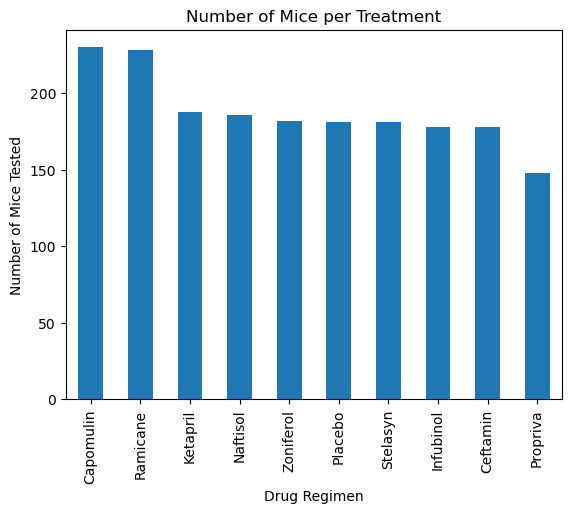

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_count = clean_df["Drug Regimen"].value_counts()
plot_pandas = mice_count.plot.bar(color='tab:blue')  
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Number of Mice per Treatment")

plt.show()

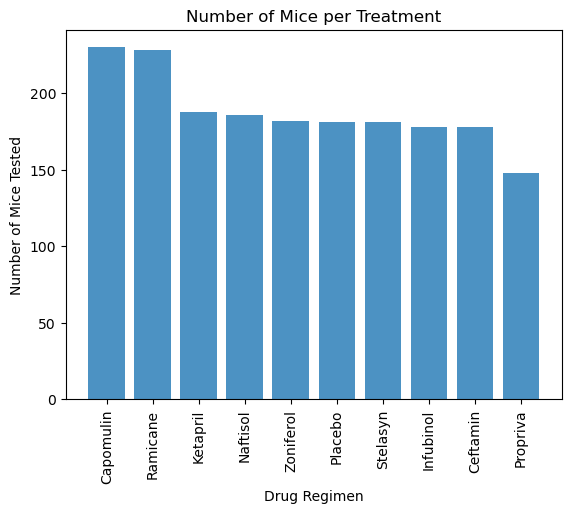

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values

plt.bar(x_axis, y_axis, color='tab:blue', alpha=0.8, align='center')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation="vertical")
plt.title("Number of Mice per Treatment")

plt.show()

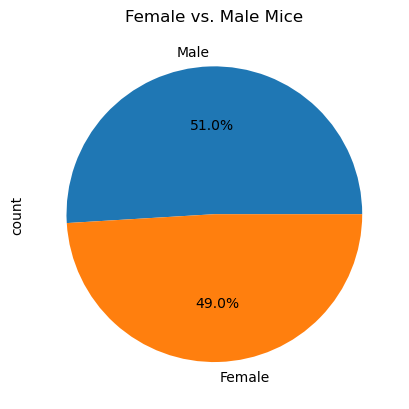

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = clean_df["Sex"].value_counts()
gender_data.plot.pie(autopct= "%1.1f%%")
plt.title("Female vs. Male" + " Mice")
plt.show()

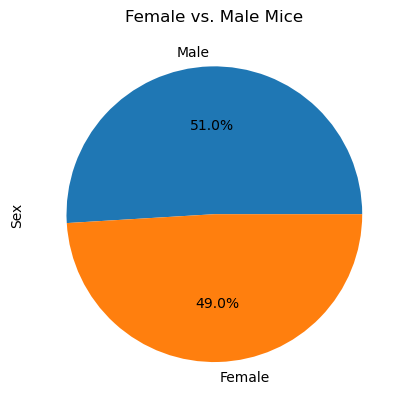

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#gender_data = clean_df["Sex"].value_counts()
labels = ['Female', 'Male']
plot = gender_data.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.ylabel('Sex')
plt.title("Female vs. Male" + " Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_mouse = data_combine.groupby(["Mouse ID"])['Timepoint'].max()
#by_mouse_reset = by_mouse.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# merged_data = by_mouse.merge(data_combine,on=['Mouse ID','Timepoint'],how="left")
merged_data = pd.merge(max_mouse , clean_df, on=(["Mouse ID","Timepoint"]))
merged_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_names = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for name in treatment_names:
    
    # add subset 
    Tum_vol = merged_data.loc[merged_data["Drug Regimen"] == name]['Tumor Volume (mm3)']
    tumor_volume_data.append(Tum_vol)
    #print(treatments)
    # Locate the rows which contain mice on each drug and get the tumor volumes    
    quartile = Tum_vol.quantile([0.25,0.5,0.75])
    lower = quartile[0.25]
    upper = quartile[0.75]
    iqr = upper - lower
    #print(iqr)
 
    # Bounds
    lower_bound = lower - (1.5 * iqr)
    upper_bound = upper + (1.5 * iqr)

    # Determine outliers using upper and lower bounds  
    outliers = Tum_vol.loc[(Tum_vol > upper_bound) | (Tum_vol < lower_bound)]
    #print(outliers)
    if len(outliers) > 0:
        print(f"The outliers for {name} are {outliers}.")

The outliers for Infubinol are 31    36.321346
Name: Tumor Volume (mm3), dtype: float64.


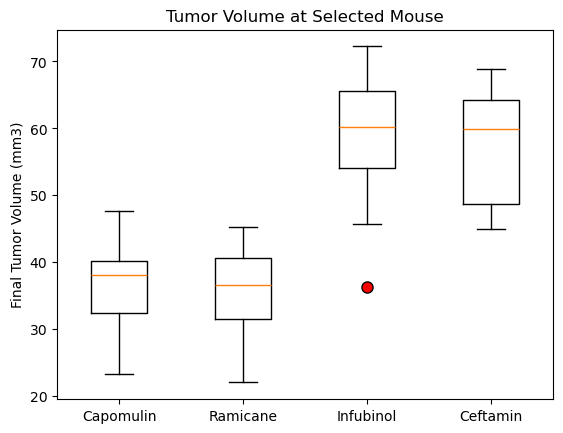

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
box_shape = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')

#plt.boxplot([Capomulin, Ramicane, Infubinol, Ceftamin],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops= box_shape)
plt.boxplot(tumor_volume_data, labels = treatment_names, flierprops = box_shape)
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Tumor Volume at Selected Mouse')
plt.show()

## Line and Scatter Plots

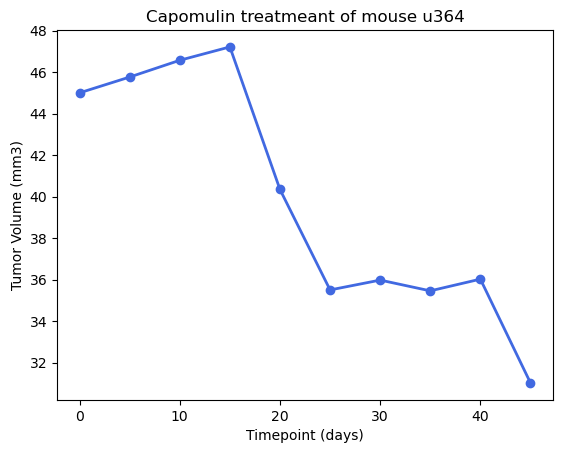

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]

line_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "u364",:]
line_df.head()
x = line_df["Timepoint"]
y = line_df["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant of mouse u364')
plt.plot(x, y, linewidth = 2, color = "royalblue", label = "Fahreneit", marker = 'o')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

(14.0, 26.0)

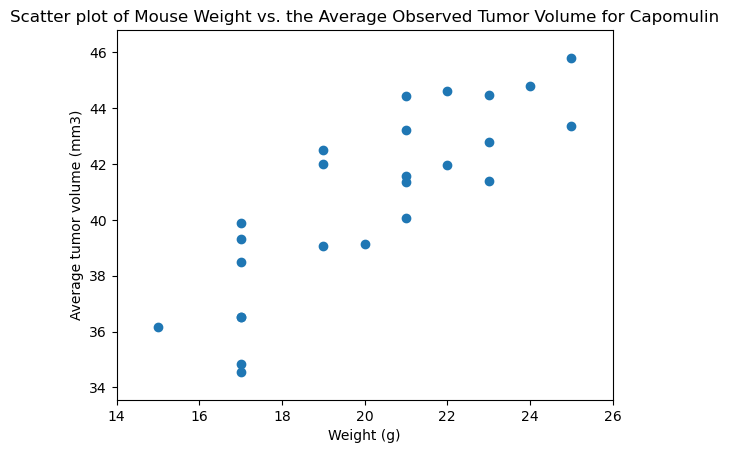

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capo_grouped = Capomulin_df.groupby(['Mouse ID'])
scatter_vol = capo_grouped['Tumor Volume (mm3)'].mean()
scatter_weight = capo_grouped['Weight (g)'].mean()

plt.scatter(scatter_weight.values,scatter_vol.values)
plt.title('Scatter plot of Mouse Weight vs. the Average Observed Tumor Volume for Capomulin')
plt.ylabel('Average tumor volume (mm3)')
plt.xlabel('Weight (g)')
plt.ylim(scatter_vol.values.min() - 1, scatter_vol.values.max() + 1)
plt.xlim(scatter_weight.values.min() - 1, scatter_weight.values.max() + 1)

## Correlation and Regression

The correlation between both factors is 0.84


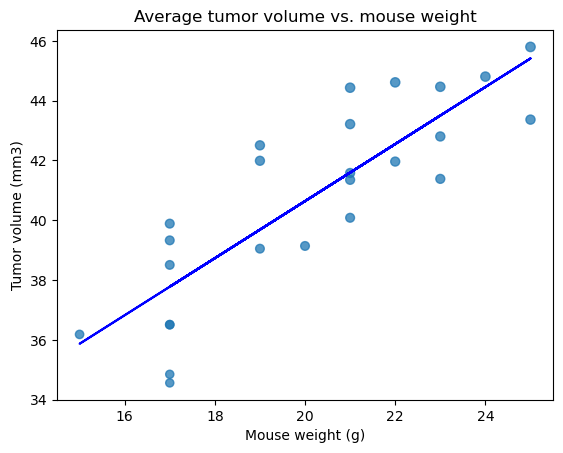

In [23]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(scatter_weight,scatter_vol)
(slope, intercept, rvalue, pvalue, stderr) = linregress(scatter_weight, scatter_vol)
regress_values = scatter_weight * slope + intercept
plt.scatter(scatter_weight, scatter_vol, marker="o", s=scatter_vol, alpha=0.75)
plt.plot(scatter_weight,regress_values,"b-")

plt.title( "Average tumor volume vs. mouse weight")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor volume (mm3)")
print(f"The correlation between both factors is {round(correlation[0],2)}")